**CSV 파일 불러오기**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/JunYoungPark/ai_study/data_files/boston.csv")
df.head()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**데이터 전처리**

In [3]:
# drop [id] column
df = df.drop(columns=["Unnamed: 0"])
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'PRICE'],
      dtype='object')

In [4]:
# 결측값 및 중복값 확인 
print(df.isna().sum())
print("\n")
print(df.duplicated().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**데이터 시각화**

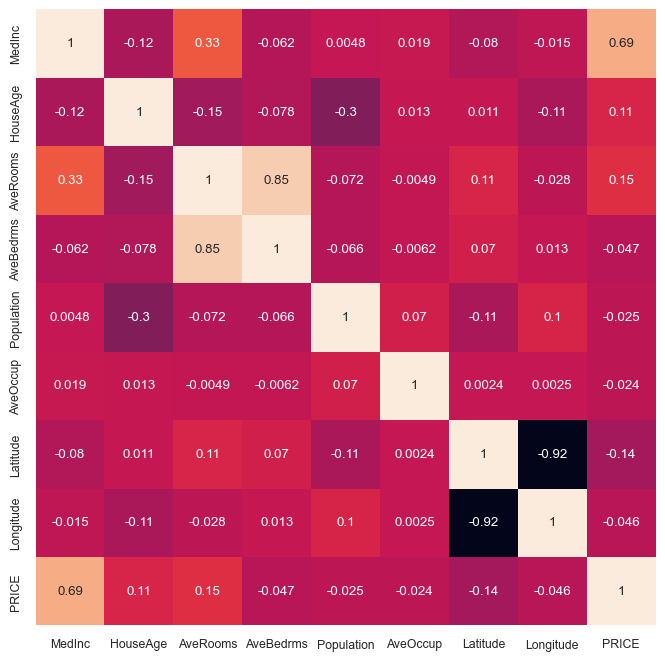

In [6]:
# 상관 관계 행렬
# 0.3 이상이면 상관관계가 있고, 0.7 이상이면 매우 높음으로 해석 

df_corr = df.corr()

# heatmap
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

**학습 준비**

In [7]:
# X, y 나누기
X = df.drop(columns=['PRICE'])
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
y = df["PRICE"]
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

In [9]:
# train_set, test_set 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16512, 8) (16512,)
(4128, 8) (4128,)


**학습**

LinearRegression MSE: 0.5289841670367202


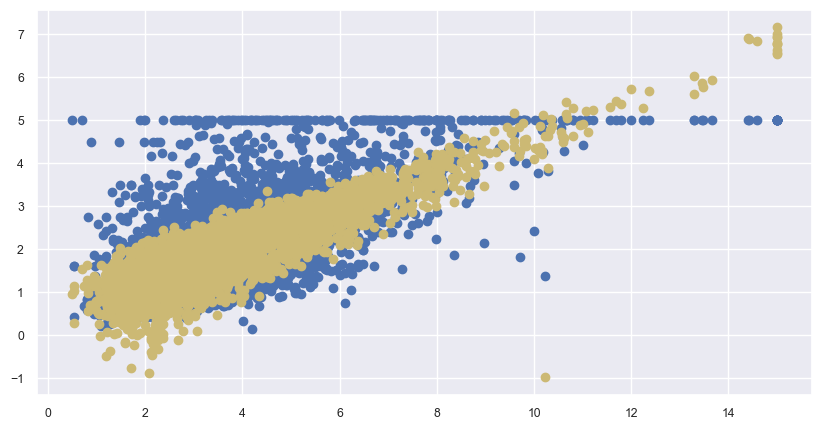

In [10]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
ly_preds = model.predict(X_test)

print("LinearRegression MSE:", mean_squared_error(ly_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(10,5))
plt.scatter(X_test['MedInc'], y_test, label='y_test')
plt.scatter(X_test['MedInc'], ly_preds, c='y', label='ly_preds')
plt.show()         

DecisionTreeRegressor MSE: 0.5453002775236676


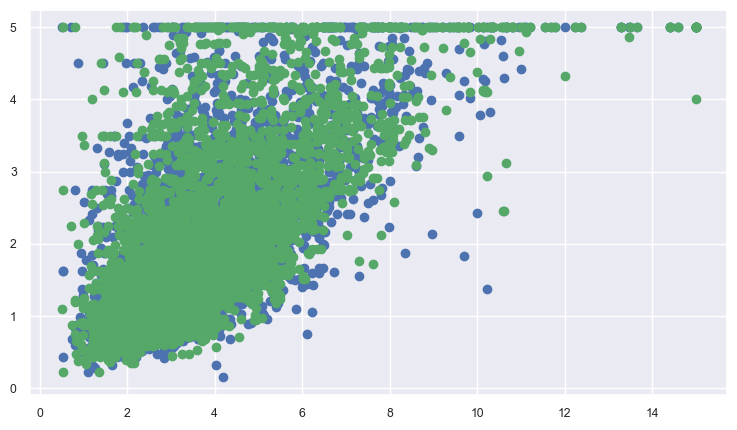

In [12]:
# DecisionTree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
dy_preds = model.predict(X_test)

print("DecisionTreeRegressor MSE:", mean_squared_error(dy_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(9,5))
plt.scatter(X_test['MedInc'], y_test, label="y_test")
plt.scatter(X_test['MedInc'], dy_preds, c="g", label='dy_preds')
plt.show()

RandomForestRegressor MSE: 0.25979811498989536


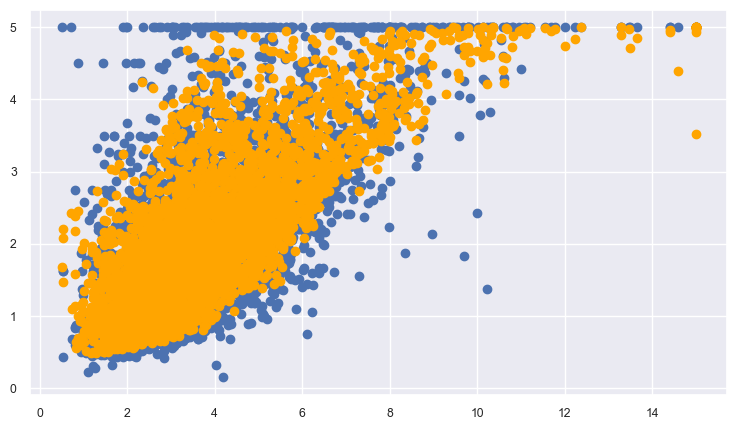

In [13]:
# RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()
model.fit(X_train, y_train)
rf_preds = model.predict(X_test)

print("RandomForestRegressor MSE:", mean_squared_error(rf_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(9,5))
plt.scatter(X_test['MedInc'], y_test, label="y_test")
plt.scatter(X_test['MedInc'], rf_preds, c="orange", label='rf_preds')
plt.show()

SVR MSE: 0.2602656334153768


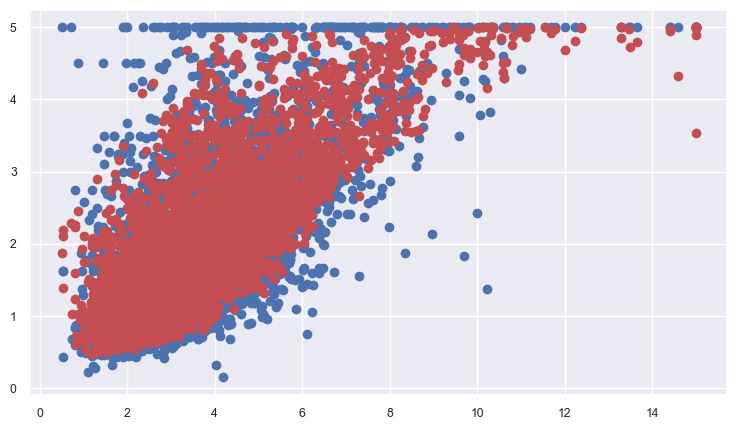

In [14]:
# SVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

model = RandomForestRegressor()
model.fit(X_train, y_train)
svr_preds = model.predict(X_test)

print("SVR MSE:", mean_squared_error(svr_preds, y_test)) 

# 예측값과 실제값 차이 시각화
plt.figure(figsize=(9,5))
plt.scatter(X_test['MedInc'], y_test, label="y_test")
plt.scatter(X_test['MedInc'], svr_preds, c="r", label='svr_preds')
plt.show()